# Assignment 10

In this assignment we will find less computational power consuming ways to find convolution of signals. We will cover linear convolution and circular convolution(using fft). At last we will be analysing the cross 
co-relation output of the Zadoff–Chu sequence.

In [88]:
from pylab import *
import scipy.signal as sp

## Question 1
Reading co-efficients from the file...

In [89]:
file=open("h.csv",'r')
h=asarray([float(thing) for thing in (file.readlines())])
print("Coefficients are")
print(h); 
file.close()

Coefficients are
[ 0.003261   0.0076237 -0.022349  -0.054296   0.12573    0.44003
  0.44003    0.12573   -0.054296  -0.022349   0.0076237  0.003261 ]


## Question 2
Now we will use the scipy.signal.freqz function to visualize the filter in frequency domain.

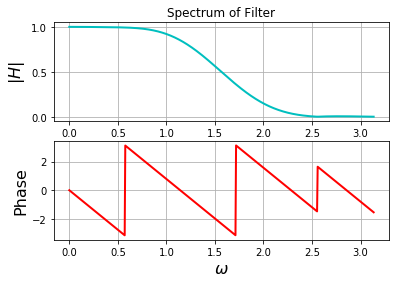

In [90]:
w,H=sp.freqz(h)
figure()
subplot(2,1,1)
plot(w,abs(H),'c',lw=2)
ylabel("$|H|$",size=16)
title("Spectrum of Filter")
grid(True)
subplot(2,1,2)
plot(w,angle(H),'r',lw=2)
ylabel("Phase",size=16)
xlabel("$\omega$",size=16)
grid(True); 
show()

We can clearly see that it is a low-pass filter with cutoff frequency between 0.5 rad/s and 1 rad/s.

## Question 3

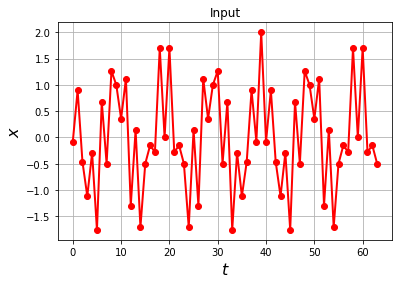

In [91]:
n=arange(1024)+1
x=cos(0.2*pi*n)+cos(0.85*pi*n)
plot(x[:64],'ro-',lw=2)
ylabel("$x$",size=16)
xlabel("$t$",size=16)
title("Input")
grid(True)
show()

## Question 4

Let us pass this function to our low-pass filter to find out the output. We can find by linear convolution in time domain.

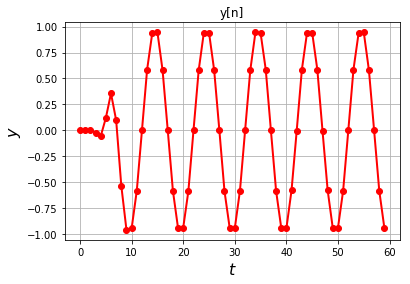

In [92]:
y=zeros(len(h)+len(x)-1)
for n in range(len(y)):
    for k in range(len(h)):
            if (n>=k)and(n-k<1024):
                y[n] += x[n-k]*h[k] 
show()
plot(y[:60],'ro-',lw=2)
ylabel("$y$",size=16)
xlabel("$t$",size=16)
title("y[n]")
grid(True)
show()

Here we are clearly able to see that the higher frequency of 0.85$\pi$ has been rejected as it is a
low-pass system.Hence the output has only one frequency component. 

## Question 5
Now let us use circular convolution. I'm initially padding my signals in to avoid overlapping of the output over itself, just like we do in digital signal processing.

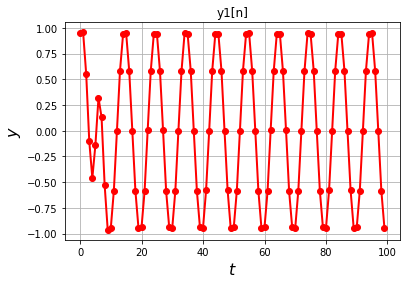

In [93]:
h1=concatenate((h,zeros(len(x)-len(h))))
y1=ifft(fft(x)*fft(concatenate((h,zeros(len(x)-len(h))))))
plot(y1[:100],'ro-',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title("y1[n]")
grid(True)
show()

## Question 6
Linear convolution using circular convolution

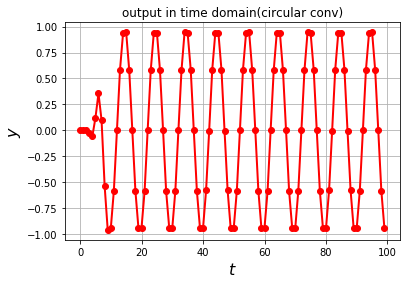

In [94]:
h2=concatenate((h,zeros(len(x)-1)))
x2=concatenate((x,zeros(len(h)-1)))
y2=ifft(fft(x2)*fft(h2))
y2=reshape(y2,(-1,1))
plot(y2[:100],'ro-',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"output in time domain(circular conv)")
grid(True)
show()

## Question 7
In this section, we will take an example sequence which is widely used in communications called as Zadoff-Chu sequences.

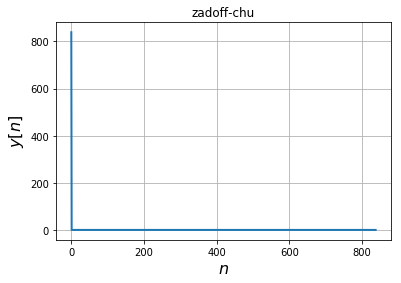

In [95]:
file=open("x1.csv",'r')
x1=file.readlines()
file.close()
for i in range(len(x1)):
    x1[i]=complex(x1[i])
shift=5
x2=x1.copy()
x1[shift-1:]=x2[:-shift]
x1[:shift-1]=x2[-shift:]
X1=fft(x1)
X2=fft(x1)
Y=X1*conj(X2)
y=ifft(Y)
plot(abs(y),lw=2)
xlabel("$n$",size=16)
ylabel("$y[n]$",size=16)
title("zadoff-chu")
grid(True);
show()

We observed that crosscorrelation function of Zadoff–Chu sequence with its circularly shifted version
of itself. We observe a sharp peak according to the circular shift done.